In [32]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2905 non-null   datetime64[ns]
 1   y       2905 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB
None


<AxesSubplot: xlabel='ds'>

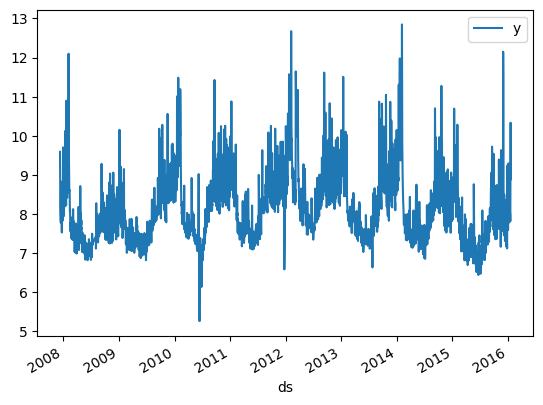

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.ds = pd.to_datetime(df.ds)
print(df.info())
df.plot(x='ds', y='y')

In [34]:
m = Prophet()
m.fit(df)

16:12:46 - cmdstanpy - INFO - Chain [1] start processing
16:12:46 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204233,7.489316,8.933388
3266,2017-01-16,8.529241,7.782096,9.247027
3267,2017-01-17,8.316651,7.584557,9.059989
3268,2017-01-18,8.149239,7.423190,8.892115
3269,2017-01-19,8.161151,7.410964,8.896029


In [37]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270 entries, 0 to 3269
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          3270 non-null   datetime64[ns]
 1   trend                       3270 non-null   float64       
 2   yhat_lower                  3270 non-null   float64       
 3   yhat_upper                  3270 non-null   float64       
 4   trend_lower                 3270 non-null   float64       
 5   trend_upper                 3270 non-null   float64       
 6   additive_terms              3270 non-null   float64       
 7   additive_terms_lower        3270 non-null   float64       
 8   additive_terms_upper        3270 non-null   float64       
 9   weekly                      3270 non-null   float64       
 10  weekly_lower                3270 non-null   float64       
 11  weekly_upper                3270 non-null   float64     

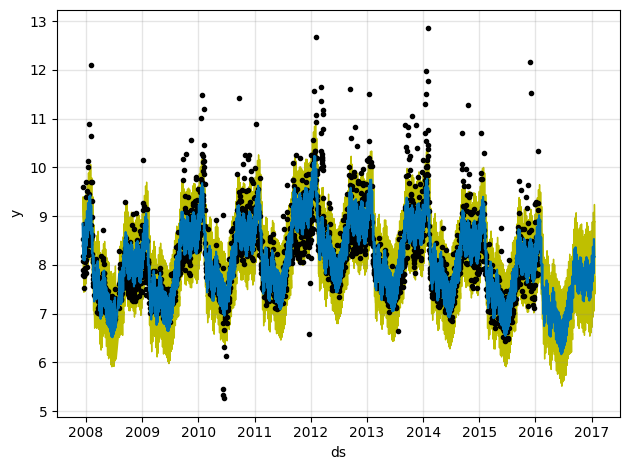

In [57]:
fig, ax = plt.subplots(*(1, 1))
fig1 = m.plot(forecast, uncertainty=False, ax=ax)
ax.fill_between(x=forecast.ds, y1=forecast.yhat_lower.values, y2=forecast.yhat_upper.values, color='y')